<a href="https://colab.research.google.com/github/pinilDissanayaka/Face-Mask-Detection/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install livelossplot
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 7.1 MB/s eta 0:00:00


In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download vijaykumar1799/face-mask-detection

100% 221M/222M [00:02<00:00, 71.9MB/s]
100% 222M/222M [00:02<00:00, 79.1MB/s]


In [4]:
! unzip /content/face-mask-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/with_mask/1890.png  
  inflating: Dataset/with_mask/1891.png  
  inflating: Dataset/with_mask/1892.png  
  inflating: Dataset/with_mask/1893.png  
  inflating: Dataset/with_mask/1894.png  
  inflating: Dataset/with_mask/1895.png  
  inflating: Dataset/with_mask/1896.png  
  inflating: Dataset/with_mask/1897.png  
  inflating: Dataset/with_mask/1898.png  
  inflating: Dataset/with_mask/1899.png  
  inflating: Dataset/with_mask/19.png  
  inflating: Dataset/with_mask/190.png  
  inflating: Dataset/with_mask/1900.png  
  inflating: Dataset/with_mask/1901.png  
  inflating: Dataset/with_mask/1902.png  
  inflating: Dataset/with_mask/1903.png  
  inflating: Dataset/with_mask/1904.png  
  inflating: Dataset/with_mask/1905.png  
  inflating: Dataset/with_mask/1906.png  
  inflating: Dataset/with_mask/1907.png  
  inflating: Dataset/with_mask/1908.png  
  inflating: Dataset/with_mask/1909.png  
  inflating: Dataset/with_ma

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKerasTF
import visualkeras

import warnings
warnings.filterwarnings(action = 'ignore')

In [6]:
rootdir = '/content/Dataset'

In [7]:
out_classes = os.listdir(rootdir)
out_size = len(out_classes)

print(f"outupt classes : {out_classes}")
print(f"output size : {out_size}")

outupt classes : ['mask_weared_incorrect', 'without_mask', 'with_mask']
output size : 3


In [8]:
allimg = 0
for i in range(0, out_size):
    print(f"{out_classes[i]} contain {len(os.listdir(rootdir + '/' + out_classes[i]))} images.")
    allimg = (len(os.listdir(rootdir + '/' + out_classes[i]))) + allimg

print(f"Found {allimg} images belonging to {out_size} classes.")

mask_weared_incorrect contain 2994 images.
without_mask contain 2994 images.
with_mask contain 2994 images.
Found 8982 images belonging to 3 classes.


Text(0.5, 1.0, 'mask_weared_incorrect')

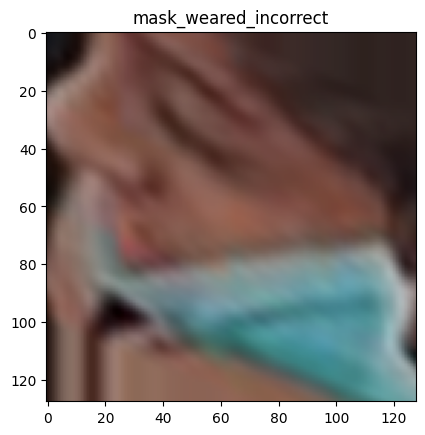

In [9]:
img = plt.imread((rootdir + '/' + out_classes[0] + '/' + (os.listdir(rootdir + '/' + out_classes[0])[1])))
plt.imshow(img)
plt.title(out_classes[0])

Text(0.5, 1.0, 'without_mask')

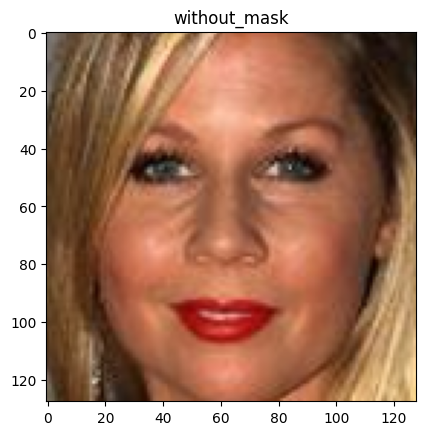

In [11]:
img = plt.imread((rootdir + '/' + out_classes[1] + '/' + (os.listdir(rootdir + '/' + out_classes[1])[1])))
plt.imshow(img)
plt.title(out_classes[1])

Text(0.5, 1.0, 'with_mask')

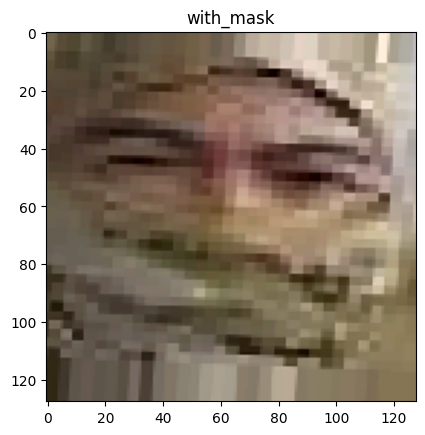

In [13]:
img = plt.imread((rootdir + '/' + out_classes[2] + '/' + (os.listdir(rootdir + '/' + out_classes[1])[1])))
plt.imshow(img)
plt.title(out_classes[2])

In [14]:
img_size = [128, 128, 3]

resnetmodel = ResNet50V2(input_shape = img_size, weights = 'imagenet', include_top=False)

In [15]:
for layer in resnetmodel.layers:
  layer.trainable = False

In [16]:
x = Flatten()(resnetmodel.output)
pred = Dense(units= out_size, activation= 'softmax')(x)

model = Model(inputs = resnetmodel.input, outputs  = pred)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 66, 66, 64)           0         ['conv1_conv[0][0]']          
                                                                                              

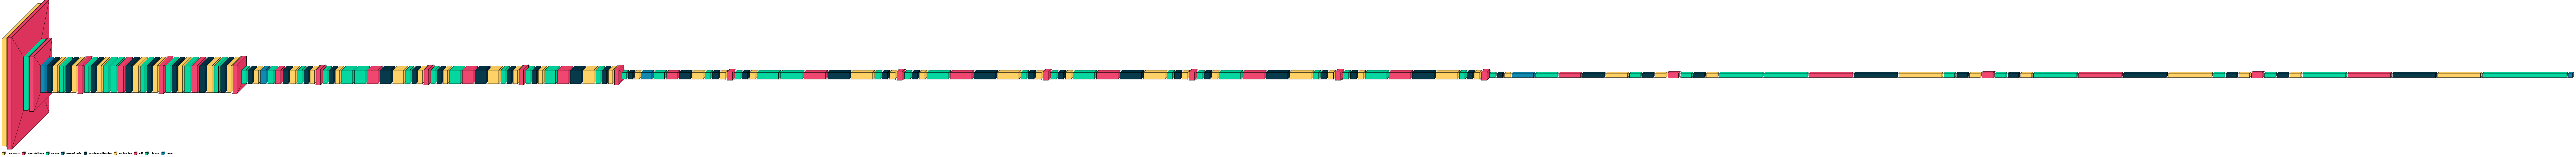

In [18]:
visualkeras.layered_view(model, legend=True)

In [21]:
data_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.6,
                               zoom_range = 0.3,
                               horizontal_flip = True,
                              validation_split = 0.2)

In [23]:
train_df = data_gen.flow_from_directory(rootdir,
                                  target_size = (128, 128),
                                  batch_size = 100,
                                  class_mode= 'categorical',
                                  subset = 'training')

valid_df = data_gen.flow_from_directory(rootdir,
                                  target_size = (128, 128),
                                  batch_size = 100,
                                  class_mode= 'categorical',
                                  subset = 'validation')

Found 7188 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


In [25]:
training_steps = train_df.n // train_df.batch_size
valid_steps = valid_df.n // valid_df.batch_size


print(f"Steps per training epoch : {training_steps}")
print(f"steps per validation epochs : {valid_steps}")

Steps per training epoch : 71
steps per validation epochs : 17


In [26]:
train_df.class_indices

{'mask_weared_incorrect': 0, 'with_mask': 1, 'without_mask': 2}

In [27]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [29]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience=1, verbose=1)

call_backs = [early_stopping, PlotLossesKerasTF()]

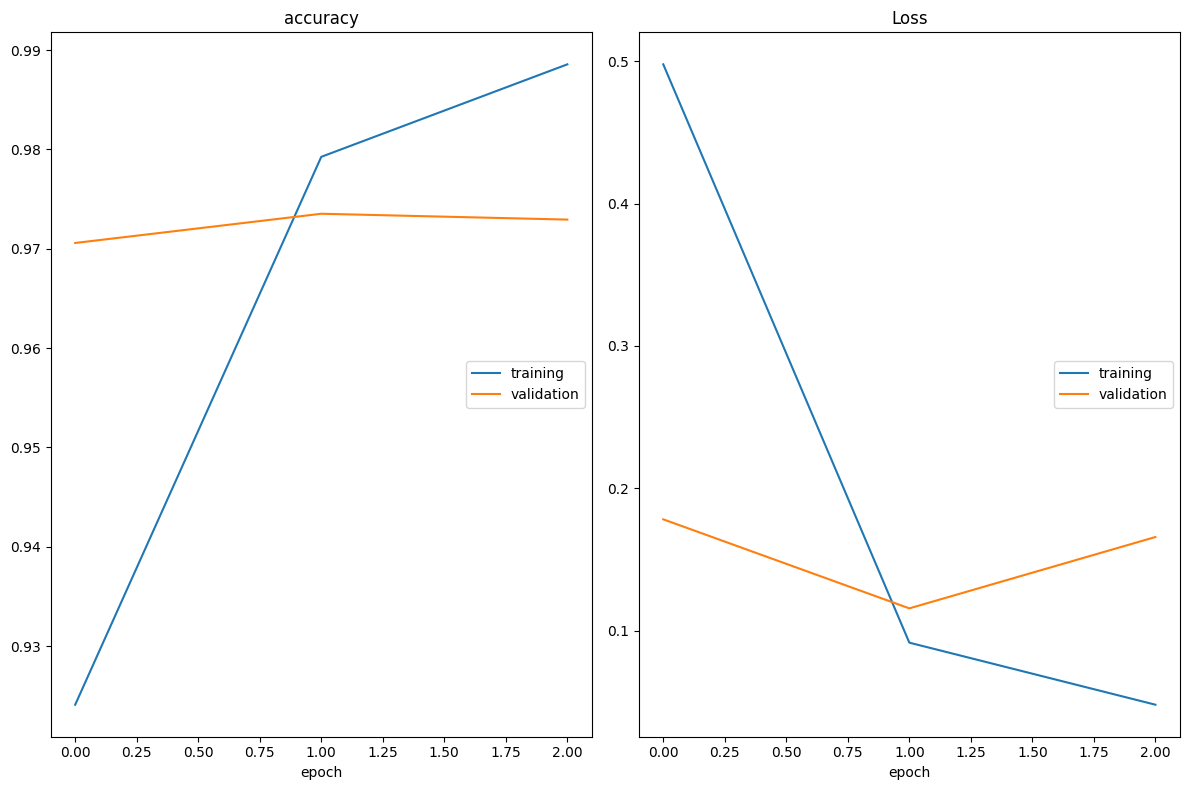

accuracy
	training         	 (min:    0.924, max:    0.989, cur:    0.989)
	validation       	 (min:    0.971, max:    0.974, cur:    0.973)
Loss
	training         	 (min:    0.048, max:    0.498, cur:    0.048)
	validation       	 (min:    0.116, max:    0.178, cur:    0.166)
71/71 [==============================] - 49s 682ms/step - loss: 0.0479 - accuracy: 0.9886 - val_loss: 0.1657 - val_accuracy: 0.9729
Epoch 3: early stopping


In [32]:
model_hist = model.fit_generator(
    train_df,
    epochs = 10,
    validation_data = valid_df,
    steps_per_epoch = training_steps,
    validation_steps = valid_steps,
    callbacks= call_backs
)

In [33]:
model.evaluate_generator(valid_df)

[0.1542963832616806, 0.9721293449401855]